

# Project: Investigate a  European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



##### import packages that i'll use to investigate

In [1]:
#import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sqlite3 as sq
from bs4 import BeautifulSoup
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


<ul>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessind</a></li>    
<li><a href="#clean">Cleaning</a></li>
</ul>

<a id='gather'></a>
# Gathering Data

### I use European soceer dataset ,, this is sqlite dataset has 8 tables,for that,
###    -maked a connection with sqlite to gather the data then
###    -get each table in database through queries and load it in a dataframe and showed the first two observation from a table

###### gathering Match Table

In [2]:
#make a connection with sqlite database
conn=sq.connect('database.sqlite')
# type a quuery to select all columns and rows to store them in dataframe
df_country=pd.read_sql_query('select * from Country',conn)
#show the first two obesrvations from a table
df_country.head(2)

,id,name
0,1,Belgium
1,1729,England


###### gathering League Table

In [3]:
df_League=pd.read_sql_query('select * from league',conn)
df_League.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


###### gathering Match Table

In [4]:
df_Match=pd.read_sql_query('select * from Match',conn)
df_Match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


###### gathering Player Table

In [5]:
df_Player=pd.read_sql_query('select * from Player',conn)
df_Player.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


###### gathering Team Table

In [6]:
df_Team=pd.read_sql_query('select * from Team',conn)
df_Team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


###### gathering Team_attributes Table

In [7]:
df_Teamattributes=pd.read_sql_query('select * from Team_Attributes',conn)
df_Teamattributes.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


###### gathering Player_attributes Table

In [8]:
df_Playerattributes=pd.read_sql_query('select * from Player_Attributes',conn)
df_Playerattributes.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


###### gathering sqlitesequence Table

In [9]:
df_sqlitesequence=pd.read_sql_query('select * from sqlite_sequence',conn)
df_sqlitesequence.head(2)

,name,seq
0,Team,103916
1,Country,51958


<a id='assess'></a>
# Assessing

### check the dirty and messy data for each dataframe

###### country Table asssess

In [10]:
#get the data types of columns of the Table
df_country.dtypes

id       int64
name    object
dtype: object

In [11]:
# print the number of observations
print('number of observations in country table:',df_country.shape[0])
# print the number of columns 
print('number of columns in country table:',df_country.shape[1])

number of observations in country table: 11
number of columns in country table: 2


In [12]:
# print the number of all null values
print('number of null values in country table:',df_country.isnull().sum().sum())
# print the number of all dublicated values
print('number of dublicated values in country table:',df_country.duplicated().sum())

number of null values in country table: 0
number of dublicated values in country table: 0


###### League Table assess

In [13]:
df_League.dtypes

id             int64
country_id     int64
name          object
dtype: object

In [14]:
print('number of observations in League table:',df_League.shape[0])
print('number of columns in League table:',df_League.shape[1])

number of observations in League table: 11
number of columns in League table: 3


In [15]:
print('number of null values in League table:',df_League.isnull().sum().sum())
print('number of dublicated values in league table:',df_League.duplicated().sum())

number of null values in League table: 0
number of dublicated values in league table: 0


###### Match Table assess

In [16]:
print('number of observations in Match table:',df_Match.shape[0])
print('number of columns in Match table:',df_Match.shape[1])

number of observations in Match table: 25979
number of columns in Match table: 115


In [17]:
print('number of null values in Match table:',df_Match.isnull().sum().sum())

number of null values in Match table: 407395


In [18]:
print('number of dublicated values in Match table:',df_Match.duplicated().sum())

number of dublicated values in Match table: 0


###### Team Table assess

In [19]:
print(df_Team.dtypes)
print('number of observations in Team table:',df_Team.shape[0])
print('number of columns in Team table:',df_Team.shape[1])
print('number of dublicated values in Team table:',df_Team.duplicated().sum())

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object
number of observations in Team table: 299
number of columns in Team table: 5
number of dublicated values in Team table: 0


In [20]:
print('number of null values in Team table:\n',df_Team.isnull().sum())

number of null values in Team table:
 id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


###### Players Table assess

In [21]:
print(df_Player.dtypes)
print('number of observations in Player table:',df_Player.shape[0])
print('number of columns in Player table:',df_Player.shape[1])
print('number of dublicated values in Player table:',df_Player.duplicated().sum())
print('number of null values in Player table:',df_Player.isnull().sum().sum())

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object
number of observations in Player table: 11060
number of columns in Player table: 7
number of dublicated values in Player table: 0
number of null values in Player table: 0


###### Player_Atributes Table Assess

In [22]:
print(df_Playerattributes.dtypes)

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [23]:
print(df_Playerattributes.isnull().sum().sum())

47301


In [24]:
print('number of observations in Player table:',df_Playerattributes.shape[0])
print('number of columns in Player table:',df_Playerattributes.shape[1])
print('number of dublicated values in Player table:',df_Playerattributes.duplicated().sum())

number of observations in Player table: 183978
number of columns in Player table: 42
number of dublicated values in Player table: 0


###### Team_Atrributes Table assess

In [25]:
print(df_Teamattributes.dtypes)

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

In [26]:
print('number of null values in Team_attributes table:',df_Teamattributes.isnull().sum().sum())

number of null values in Team_attributes table: 969


In [27]:
print('number of observations in Team_attributes table:',df_Teamattributes.shape[0])
print('number of columns in Team_attributes table:',df_Teamattributes.shape[1])
print('number of dublicated values in Team_attributes table:',df_Teamattributes.duplicated().sum())

number of observations in Team_attributes table: 1458
number of columns in Team_attributes table: 25
number of dublicated values in Team_attributes table: 0


<a id='clean'></a>
# Data cleaning(based on the questions)

######  the Match table has  alot of columns with Incomprehensible titles ,drop the columns i dont use them in analysis  

In [28]:
#cleaning with drop the columns i dont use them in analysis
df_Match.drop(df_Match.iloc[:,11:81],inplace=True,axis=1)

#### the Match table has 'card' and 'corner' columns in html form so, i make parsing for card column to two lists 'card_home':cards that the home team taked and 'card_away' that the againest team taked,then i make parsing for corner column to two lists 'corner_home':corners that the home team taked and 'corner_away' that the againest team taked

#### build a function helps to parse each row in card and corner columns

In [29]:
def parsing_col(column_name):
        home=0
        away=0
        _home=list()
        _away=list()
        for row in range(df_Match.shape[0]):
            if df_Match[column_name][row]!=None:
                soup=BeautifulSoup(df_Match[column_name][row])
                c=soup.find_all('team')
                for i in range(len(c)):
                    if int(c[i].contents[0])==df_Match['home_team_api_id'][row]:
                          home=home+1
                    elif int(c[i].contents[0])==df_Match['away_team_api_id'][row]:
                          away=away+1
            _home.append(home)
            _away.append(away)
            home=0
            away=0
        return _home,_away

In [30]:
# parsing for corner column to two lists 'corner_home':corners that the home team taked
# and 'corner_away' that the againest team taked
#i parsed the corner column becausee i will use it in questions
corner_home,corner_away=parsing_col('corner')

#### after parsing the corner column , i will insert the two lists in Match table and drop corner column from it.

In [31]:
df_Match.drop(columns=['corner'],axis=1,inplace=True)
df_Match.insert(11,'home_corner',corner_home)
df_Match.insert(12,'away_corner',corner_away)

In [32]:
# parsing for card column to two lists 'card_home':cards that the home team taked
# and 'card_away' that the againest team taked
#i parsed the card column becausee i will use it in questions
card_home,card_away=parsing_col('card')

#### after parsing the card column , i will insert the two lists in Match table and drop card column from it.

In [33]:
#remove the card column that is in xml shape
df_Match.drop(columns=['card'],axis=1,inplace=True)

In [34]:
#insert the home_card list in datafram of match table
df_Match.insert(13,'home_card',card_home)

In [35]:
#insert the away_card list in datafram of match table
df_Match.insert(14,'away_card',card_away)

In [36]:
#drop rest of unuse columns
df_Match.drop(df_Match.iloc[:,15:47],inplace=True,axis=1)

In [37]:
#show the results of Match table after droping and insertion
df_Match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_corner,away_corner,home_card,away_card
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,0,0,0,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,0,0,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,0,0,0
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,0,0,0,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,0,0,0


In [38]:
# remove the sqlitesequence dataframe because i won't use it
df_sqlitesequence=None

<a id='eda'></a>
## Exploratory Data Analysis



## Questions
<ul>
<li><a href="#Question1">Question1</a></li>
<li><a href='#Question2'>Question2</a></li>
<li><a href='#Question3'>Question3</a></li>
<li><a href='#Question4'>Question4</a></li>
<li><a href='#Question5'>Question5</a></li>
<li><a href='#Question6'>Question6</a></li>
<li><a href='#Question7'>Question7</a></li>
<li><a href='#Question8'>Question8</a></li>
<li><a href='#Question9'>Question9</a></li>
</ul>
<ul>

<a id='Question1'></a>
# Question 1-what are the best teams over all the seasons?

#### i will get the best team based on the number of goals 
#### used match table to know the number of goals for each team and extract the team_id with maximum goals in each season
#### searching for teams name in team Table using extraction ids

In [39]:
#i will get the best team based on the number of goals 
#used match table to know the number of goals for each team in each season
home_team_goal=df_Match.groupby(['season','home_team_api_id'])['home_team_goal'].sum().reset_index()

In [40]:
maximum_home=home_team_goal.groupby('season').max().reset_index()

In [41]:
#searching function,,, search on the ids on a table based on ids in another table and print the name (player or team or ..) 
def searching_on_names(ids1,ids2,name):
    names=list()
    for i in range(len(ids2)):
        for j in range(len(ids1)):
            if ids1[j]==ids2[i]:
                names.append(name[j])
    return names

In [42]:
#searching on the names of teams are the best over all seasons based on number of goals their scored in home_teams
Teams_home=searching_on_names(df_Team['team_api_id'],maximum_home['home_team_api_id'],df_Team['team_long_name'])
maximum_home.insert(3,'team_name',Teams_home)
maximum_home

,season,home_team_api_id,home_team_goal,team_name
0,2008/2009,10281,61,Real Valladolid
1,2009/2010,10281,68,Real Valladolid
2,2010/2011,108893,61,AC Arles-Avignon
3,2011/2012,10269,73,VfB Stuttgart
4,2012/2013,10281,67,Real Valladolid
5,2013/2014,158085,64,FC Arouca
6,2014/2015,274581,65,Royal Excel Mouscron
7,2015/2016,274581,70,Royal Excel Mouscron


In [43]:
#used match table to know the number of goals for each team in each season in away teams
away_team_goal=df_Match.groupby(['season','away_team_api_id'])['away_team_goal'].sum().reset_index()
maximum_away=away_team_goal.groupby('season').max().reset_index()

In [44]:
#searching on the names of teams are the best over all seasons based on number of goals their scored in away_teams
Teams_away=searching_on_names(df_Team['team_api_id'],maximum_away['away_team_api_id'],df_Team['team_long_name'])
maximum_away.insert(3,'team_name',Teams_away)
maximum_away

,season,away_team_api_id,away_team_goal,team_name
0,2008/2009,10281,44,Real Valladolid
1,2009/2010,10281,42,Real Valladolid
2,2010/2011,108893,49,AC Arles-Avignon
3,2011/2012,10269,51,VfB Stuttgart
4,2012/2013,10281,52,Real Valladolid
5,2013/2014,158085,52,FC Arouca
6,2014/2015,274581,53,Royal Excel Mouscron
7,2015/2016,274581,47,Royal Excel Mouscron


In [45]:
#print the top teams overall seasons 
maximum_away

,season,away_team_api_id,away_team_goal,team_name
0,2008/2009,10281,44,Real Valladolid
1,2009/2010,10281,42,Real Valladolid
2,2010/2011,108893,49,AC Arles-Avignon
3,2011/2012,10269,51,VfB Stuttgart
4,2012/2013,10281,52,Real Valladolid
5,2013/2014,158085,52,FC Arouca
6,2014/2015,274581,53,Royal Excel Mouscron
7,2015/2016,274581,47,Royal Excel Mouscron


<a id='Question2'></a>
# Question 2-which 10 Players had the most penalties?

#### use the player_attributes table to know which id_players had the most potential and extract ids.
#### searching for players name   in Player Table using extraction ids.

In [46]:
#use the player_attributes table to know which id_players had the most potential
most_penalties=df_Playerattributes.groupby('player_api_id')['penalties'].sum().reset_index()
most_penalties_sorted=most_penalties.sort_values('penalties',ascending=False,axis=0,ignore_index=True).iloc[0:10,:]
most_penalties_sorted

,player_api_id,penalties
0,41269,4314.0
1,108808,4120.0
2,41890,3984.0
3,26472,3813.0
4,25772,3799.0
5,30731,3791.0
6,27734,3767.0
7,30626,3712.0
8,40930,3682.0
9,47394,3650.0


In [47]:
#searching on names of player that had the most potential
players_name=searching_on_names(df_Player['player_api_id'],most_penalties_sorted['player_api_id'],df_Player['player_name'])
most_penalties_sorted.insert(2,'Player_name',players_name)

Text(0.5, 1.0, 'the most 10 players had penalties')

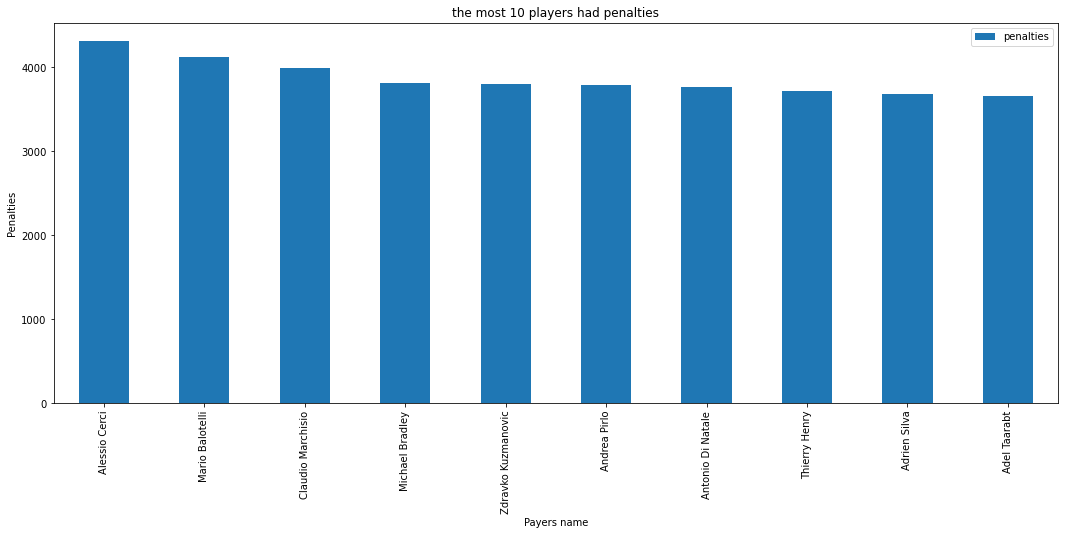

In [48]:
#print Players had the most potential
most_penalties_sorted.plot.bar(x='Player_name',y='penalties',figsize=(18,7))
plt.xlabel('Payers name')
plt.ylabel('Penalties')
plt.title('the most 10 players had penalties')

#### the above plot show the names of 10 players had most penalties over all seasons
#### the X-axis has names of Players 
#### the Y-axis has numbers of penalties

<a id='Question3'></a>
# Question 3-Team attributes lead to most victories

#### based on the best teams that i get in first question ,,i get the most  frequntly attributes of them
#### get all attributes of the best teams in a dataframe is called df_attributes

In [49]:
#based on the best teams that i get in question 1 i print the most frequntly attributes of them.
attributes=list()
for team in range(len(df_Teamattributes)):
    if df_Teamattributes['team_api_id'][team]==maximum_home['home_team_api_id'][0]:
        attributes.append(df_Teamattributes.iloc[team,:])
    
df_attributes=pd.DataFrame(attributes)

In [50]:
#drop columns i don't use them
df_attributes.drop(columns=['id','team_fifa_api_id','team_api_id','date'],axis=1,inplace=True)

#### get most frequency attributes

In [51]:
#print the most frequntly attributes of best teams
attributes_of_best_team=pd.DataFrame(df_attributes.mode().iloc[0,:])

In [52]:
attributes_of_best_team.columns=['attributes']

In [53]:
#print the attributes that lead to most victories
attributes_of_best_team

,attributes
buildUpPlaySpeed,55
buildUpPlaySpeedClass,Balanced
buildUpPlayDribbling,40
buildUpPlayDribblingClass,Little
buildUpPlayPassing,54
buildUpPlayPassingClass,Mixed
buildUpPlayPositioningClass,Organised
chanceCreationPassing,58
chanceCreationPassingClass,Normal
chanceCreationCrossing,73


<a id='Question4'></a>
# Question 4-is there coreelation between the number of cards and the outcomes of the match ?

#### classified the outcomes of each team in match Table to ['win','lose','equality']
#### then insert outcomes of home team and away team in match table
#### get home_outcomes and away_ outcomes in individual dataframe called all_outcomes then insert in it coulmn with ones to group all_outcomes by home_outcomes and away_outcomes then counts

#### convert the values of 'all_outcomes' column to columns and their values are the number of times reapeted in each card_number

In [54]:
# classified the outcomes of each team in match to ['win','lose','equality']
home_outcomes=list()
away_outcomes=list()
for i in range(len(df_Match['home_team_goal'])):
    if df_Match['home_team_goal'][i] > df_Match['away_team_goal'][i]:
        home_outcomes.append('win')
        away_outcomes.append('lose')
    elif df_Match['home_team_goal'][i] < df_Match['away_team_goal'][i]:
        away_outcomes.append('win')
        home_outcomes.append('lose')
    else:
        away_outcomes.append('equality')
        home_outcomes.append('equality')
df_Match.insert(10,'home_outcomes',home_outcomes)
df_Match.insert(12,'away_outcomes',away_outcomes)

In [55]:
all_outcomes=list()
all_cards=list()
all_outcomes=pd.concat([df_Match['home_outcomes'],df_Match['away_outcomes']],axis=0)
all_cards=pd.concat([df_Match['home_card'],df_Match['away_card']])

In [56]:
df=pd.concat([all_cards,all_outcomes],axis=1)
df['number_of_matchs']=np.repeat(1,all_cards.size)

In [57]:
df.rename(columns={0:'all_cards',1:'all_outcomes'},inplace=True)

In [58]:
df=df.groupby(['all_cards','all_outcomes']).count().reset_index()

In [59]:
df.head(3)

,all_cards,all_outcomes,number_of_matchs
0,0,equality,6727
1,0,lose,9762
2,0,win,10351


In [60]:
#convert the values of all_outcomes column to columns and their values are the number of times reapeted in each card_number
cards_outcomes=df.pivot_table(index='all_cards',columns='all_outcomes',values='number_of_matchs')

In [61]:
#rename the columns
cards_outcomes.columns=['equality','lose','win']
cards_outcomes.fillna(0,inplace=True)
cards_outcomes

,equality,lose,win
all_cards,,,
0,6727.0,9762.0,10351.0
1,1655.0,2260.0,2990.0
2,1978.0,2890.0,2755.0
3,1468.0,2245.0,1864.0
4,841.0,1336.0,871.0
5,375.0,569.0,381.0
6,114.0,223.0,126.0
7,24.0,70.0,30.0
8,6.0,16.0,13.0


Text(0, 0.5, ' Number_of_Matches')

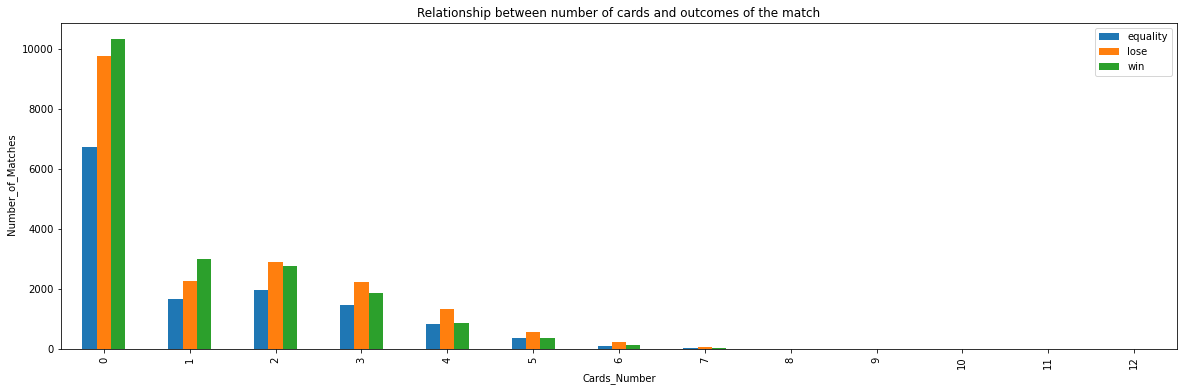

In [62]:
#show the relationship 
cards_outcomes.plot(kind='bar',figsize=(20,6))
plt.title('Relationship between number of cards and outcomes of the match')
plt.xlabel('Cards_Number')
plt.ylabel(' Number_of_Matches')

#### the above plot show the relationship between cards number that a team taked in a match and outcomes the team scored in this match
#### X-axis is Cards_number
#### Y-axis is Number of matches for eqality ,lose win
#### conclusion of this plot that there is relationship between cards number that a team taked in a match and outcomes the team scored ,,more number of cards ,, less wining the match :(
#### less number of cards ,, more chance for wining the match :)

<a id='Question5'></a>
# Question 5-what the top 6 players in 2016 ?

#### get the Top Player based on mean of overall rating in 2016 
#### convert the date column to datetime to extract the year
#### filter the table of player attributes in 2016 then groupby'player_api_id' column with mean of 'overall_rating' in dataframe called al_ids
#### searching on the name of the 6 top players in 2016 based on ids in player Table

In [63]:
# convert the date column to datetime to extract the year
df_Playerattributes['date']=pd.to_datetime(df_Playerattributes['date'])
df_Playerattributes['year']=df_Playerattributes['date'].dt.year

In [64]:
#filter the table of player attributes in 2016 
df_in_2016=df_Playerattributes.query('year==2016')
all_ids=df_in_2016.groupby('player_api_id')['overall_rating'].mean().reset_index()

In [65]:
all_ids.sort_values(ascending=False,inplace=True,by="overall_rating",ignore_index=True)
all_ids=all_ids.iloc[0:6,:]


In [66]:
#searching on the name of the 6 top players in 2016 based on ids 
name_of_player=searching_on_names(df_Player['player_api_id'],all_ids['player_api_id'],df_Player['player_name'])
all_ids.insert(1,'player_name',name_of_player)
the_top_6=all_ids

In [67]:
#print the top 6 players in 2016
the_top_6

,player_api_id,player_name,overall_rating
0,27299,Manuel Neuer,90.0
1,19533,Neymar,90.0
2,30834,Arjen Robben,89.0
3,37412,Sergio Aguero,88.0
4,36378,Mesut Oezil,88.0
5,107417,Eden Hazard,88.0


<a id='Question6'></a>
# Question 6-How many matches in each season

In [68]:
#number of Matches in each season
df_Match['season'].value_counts()

2008/2009    3326
2015/2016    3326
2014/2015    3325
2010/2011    3260
2012/2013    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

Text(0.5, 1.0, 'Number of matches in each season')

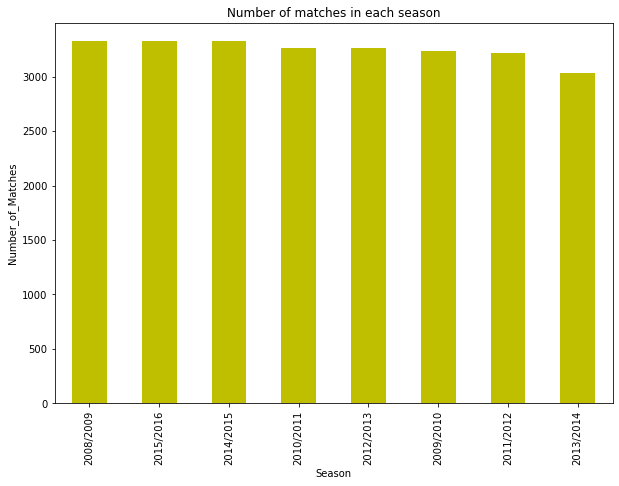

In [69]:
#number of Matches in each season
df_Match['season'].value_counts().plot.bar(figsize=(10,7),color='y')
plt.xlabel('Season')
plt.ylabel('Number_of_Matches')
plt.title('Number of matches in each season')

### the above bar plot show the number of Matches in each season
### X-axis is season
### Y-axis is Number of Matches of each season

<a id='Question7'></a>
# Question 7-How many matches in each league

In [70]:
# get unique values of league table and count hom time each unique value repeated
df_Match['league_id'].value_counts()

21518    3040
4769     3040
1729     3040
10257    3017
13274    2448
7809     2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: league_id, dtype: int64

Text(0.5, 1.0, 'Number of matches for each league')

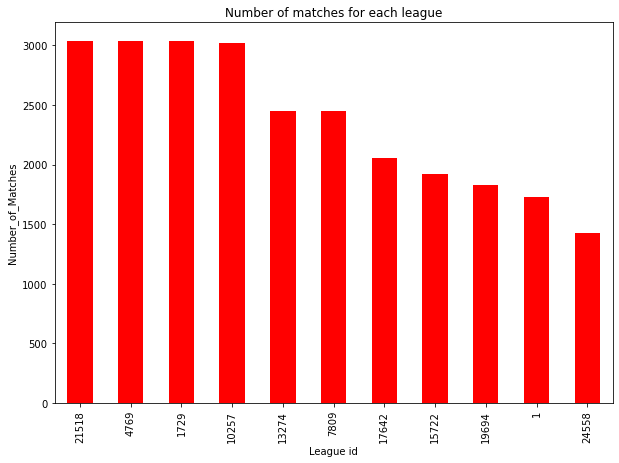

In [71]:
#number of matches for each league
df_Match['league_id'].value_counts().plot.bar(figsize=(10,7),color='r')
plt.xlabel('League id')
plt.ylabel('Number_of_Matches')
plt.title('Number of matches for each league')

### the above plot show the number of Matches in each League
### X-axis is season
### Y-axis is Number of Matches of each League

<a id='Question8'></a>
# Question 8-show the number of each outcomes for home teams and away teams , Is there a relationship between a team playing at home and winning a match?

In [72]:
df_Match['home_outcomes'].value_counts().sort_index()

equality     6596
lose         7466
win         11917
Name: home_outcomes, dtype: int64

Text(0.5, 1.0, 'Number of each outcomes for home team')

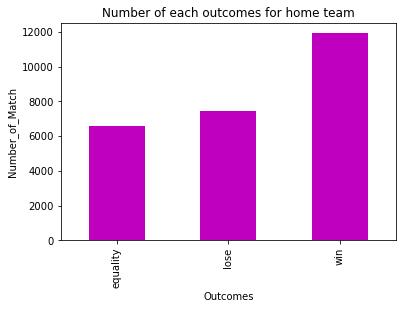

In [73]:
#show the number of each outcomes for home team
df_Match['home_outcomes'].value_counts().sort_index().plot.bar(color='m')
plt.xlabel('Outcomes')
plt.ylabel('Number_of_Match')
plt.title('Number of each outcomes for home team')

##### the above plot show the number of Matches in each Outcome for home team
##### X-axis is outcomes
##### Y-axis is Number of Matches
##### conclusion that win outcome in most matches for home team :)

In [74]:
df_Match['away_outcomes'].value_counts().sort_index()

equality     6596
lose        11917
win          7466
Name: away_outcomes, dtype: int64

Text(0.5, 1.0, 'Number of each outcomes for away team')

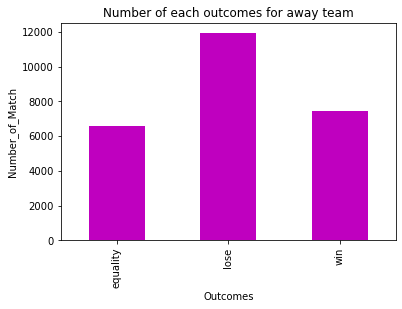

In [75]:
df_Match['away_outcomes'].value_counts().sort_index().plot.bar(color='m')
plt.xlabel('Outcomes')
plt.ylabel('Number_of_Match')
plt.title('Number of each outcomes for away team')

##### the above plot show the number of Matches in each Outcome for away team
##### X-axis is outcomes
##### Y-axis is Number of Matches
##### conclusion that lose outcome in most matches for away team :(

Text(0.5, 1.0, 'Relationship between a team playing at home and winning a match')

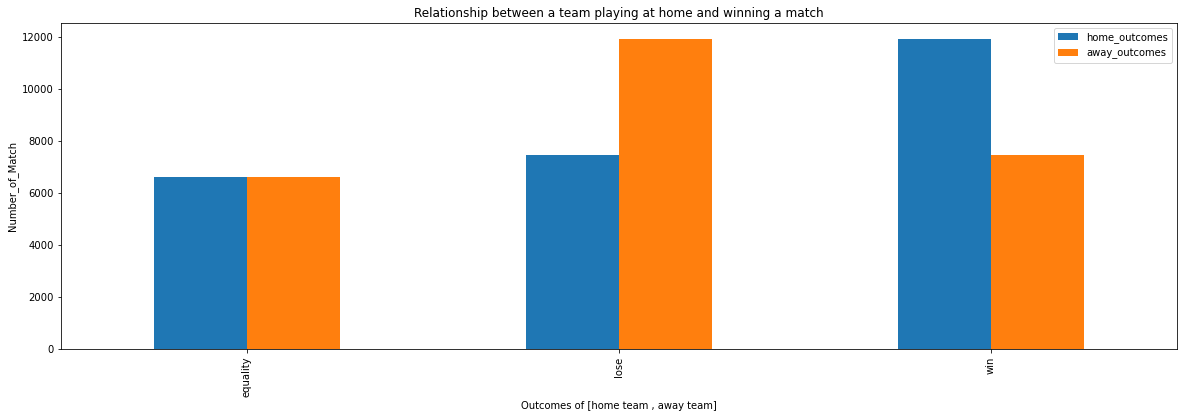

In [76]:
#relationship
df_outcomes=df_Match.loc[:,['home_outcomes','away_outcomes']]
away=df_outcomes['away_outcomes'].value_counts().sort_index().reset_index()['away_outcomes']
outcomes=pd.concat([df_outcomes['home_outcomes'].value_counts().sort_index().reset_index(),away],axis=1)
outcomes.plot(x='index',kind='bar',figsize=(20,6))
plt.xlabel('Outcomes of [home team , away team]')
plt.ylabel('Number_of_Match')
plt.title('Relationship between a team playing at home and winning a match')

### the above plot show the Relationship between a team playing at home and winning a match
### X-axis is Outcomes
### Y-axis is Number of Matches of each season
### conclusion of this plot that there is Relationship between a team playing at home and winning a match,
### when the team playing in it's home there is a bigger chance to win the match :)

<a id='Question9'></a>
# Question 9-Is there a correlation between the number of corners a team has and the number of goals the team scores?


##### append 'home_team_goal' and 'away_team_goal'  coulmns in one column caleed all_goals
##### append 'home_corner' and 'away_corner'  coulmns in one column called all_corners

In [77]:
all_goals = df_Match['home_team_goal'].append(df_Match['away_team_goal'])
all_corners = df_Match['home_corner'].append(df_Match['away_corner'])

#### get the 'all_goals' and 'all_corners' in DataFrame is called df_corners and insert column of ones

In [78]:
df_corners=pd.concat([all_goals,all_corners],axis=1)
df_corners['number_of_matchs']=np.repeat(1,all_cards.size)
df_corners.rename(columns={0:'all_goals',1:'all_corners'},inplace=True)

In [79]:
#groupby['all_goals','all_corners'] to counts with columns of ones that called number_of_match
df_corners=df_corners.groupby(['all_goals','all_corners'])['number_of_matchs'].sum().reset_index()

#### convert 'all_corners' coulmn to index column and 'all_goals' to columns and it's values the 'number_of_matchs' column

In [80]:
df_corners= df_corners.pivot_table(index='all_corners', columns='all_goals', values='number_of_matchs')
df_corners.fillna(0, inplace=True)


In [81]:
## show the df
df_corners

all_goals,0,1,2,3,4,5,6,7,8,9,10
all_corners,,,,,,,,,,,
0,9928.0,11906.0,7807.0,3656.0,1420.0,451.0,141.0,29.0,2.0,2.0,1.0
1,334.0,336.0,184.0,81.0,29.0,9.0,3.0,0.0,0.0,0.0,0.0
2,536.0,538.0,338.0,144.0,67.0,17.0,4.0,0.0,2.0,0.0,0.0
3,655.0,740.0,512.0,236.0,87.0,26.0,13.0,1.0,3.0,0.0,0.0
4,672.0,823.0,554.0,272.0,89.0,28.0,14.0,1.0,0.0,0.0,0.0
5,676.0,784.0,538.0,259.0,105.0,32.0,6.0,4.0,2.0,0.0,0.0
6,530.0,634.0,468.0,219.0,79.0,20.0,15.0,3.0,0.0,0.0,0.0
7,438.0,491.0,340.0,174.0,78.0,27.0,8.0,1.0,2.0,0.0,0.0
8,302.0,402.0,270.0,140.0,50.0,20.0,9.0,2.0,2.0,1.0,0.0


In [82]:
# Get the values of the DataFrame in a 2D Numpy array
np_goal_corner = df_corners.rename_axis('all_corners').values

### show the correlation in heatmap graph

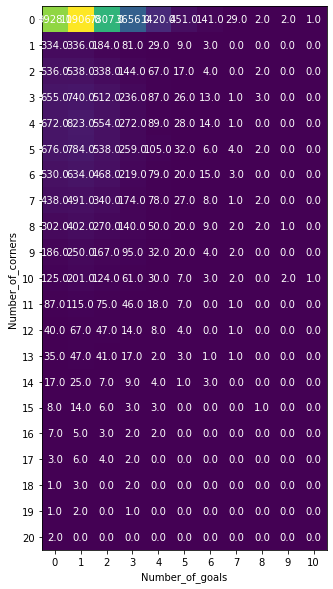

In [89]:
fig, ax = plt.subplots(figsize=(16,10))
im = ax.imshow(df_corners.rename_axis('all_corners').values)

# Show all ticks
ax.set_xticks(np.arange(len(df_corners.columns)))
ax.set_yticks(np.arange(df_corners.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(df_corners.columns)
ax.set_yticklabels(list(df_corners.index))
ax.set_ylabel("Number_of_corners")
ax.set_xlabel("Number_of_goals")

# Loop over data dimensions and create text annotations.
for row in range(df_corners.shape[0]):
    for column in range(df_corners.shape[1]):
        text = ax.text(column, row, np_goal_corner[row, column],ha="center", va="center", color="w")


### the above Heatmap show the correlation between the number of corners a team has and the number of goals the team scores
### X-axis is Number of goals
### Y-axis is Number of Corners
### conclusion of this plot that there is correlation between the number of corners a team has and the number of goals the team scores,
### the less number of corners ,,more number of goals :)

<a id='conclusions'></a>
## Conclusions


### 1-the data set i used is *European Soccer Dataset* that contains 8 tables ,, there are relationships among them, to get these tables from sqlite database i maked a connection then wrote query to extract each table and load it in a datafram.

### 2-maked assessing on each table to understand an discover the the dirty and messy data.

### 3-cleaning match table ,, removed the columns that i won't use and maked parsing for card column for each team in the match then, i removed the sqlitesequence table because i wouldn't use it.

### 4- exploratory data analysis section , i have 8 questions to analysis them,,i described them in a pdf

<a id='limitation'></a>
# Limitation

### there is hindrance such 
### 1-missing values in Match , Team_attributes Player_attributes Tables
### 2-data in html form need to scraping
### 3- match table has alot of columns with Incomprehensible titles

# References
https://www.kaggle.com

https://pandas.pydata.org/docs

https://www.youtube.com/watch?v=E7aY1XJX1og

https://www.kaggle.com/hugomathien/soccer/discussion/80756